In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()
from os import listdir, path
from natsort import natsorted
from plantcv import plantcv as pcv
import warnings
import pypandoc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import joblib
warnings.filterwarnings("ignore")

In [2]:
import joblib
from PIL import Image
import pandas as pd
import ipyplot
import numpy as np
from plantcv import plantcv as pcv
from os import listdir, path
from natsort import natsorted
import matplotlib.pyplot as plt
import math

### Read all images and split them in day and night

In [3]:
mypath = 'day-night-images'
# get all image names in path
files = natsorted([path.join(mypath, f) for f in listdir(mypath) if path.isfile(path.join(mypath, f))])
# read the images
images = [pcv.readimage(im, "native")[0] for im in files]
# split them the easy way because they are already sorted
day = images[:20]
night = images[20:]
# plt.imshow(day[0])

### Convert rgb to hsv and take the value which corresponds to brightness respectively for day and night
Each value corresponds to the mean brightness of an image

In [4]:
mean_brightness_d = [np.mean(pcv.rgb2gray_hsv(d, 'v')/250) for d in day]
mean_brightness_n = [np.mean(pcv.rgb2gray_hsv(n, 'v')/250) for n in night]

var_brightness_d = [np.var(pcv.rgb2gray_hsv(d, 'v')/250) for d in day]
var_brightness_n = [np.var(pcv.rgb2gray_hsv(n, 'v')/250) for n in night]

day_frame = pd.DataFrame(np.transpose([mean_brightness_d, var_brightness_d]), columns=['brightness_mean','brightness_var'])
night_frame = pd.DataFrame(np.transpose([mean_brightness_n, var_brightness_n]), columns=['brightness_mean','brightness_var'])

day_frame['state'] = 'day'
night_frame['state'] = 'night'

final = day_frame.append(night_frame, ignore_index=True)

# final.head(5).append(final.tail(5))
final.head()

,brightness_mean,brightness_var,state
0,0.788886,0.038575,day
1,0.814610,0.056903,day
2,0.674739,0.060287,day
3,0.728277,0.041018,day
4,0.765443,0.050812,day


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(final.drop(columns=['state']), final['state'], test_size=0.33, random_state=42)
pipeline = Pipeline([('classifier', GaussianNB()),])

tmp = pipeline.fit(X_train, Y_train)

predictions = pipeline.predict(X_test)
print(classification_report(predictions,Y_test))

              precision    recall  f1-score   support

         day       1.00      1.00      1.00         8
       night       1.00      1.00      1.00         6

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



In [25]:
pipeline = Pipeline([('classifier', GaussianNB()),])
pipeline.fit(final.drop(columns=['state']), final['state']);
joblib.dump(pipeline, 'day_night_model.joblib');

Each value corresponds to the variance between the brightness values of an image

### Plot the histograms and their density for day and night brightness
The right histogram is for day images, thus the increased mean values.  
The cross line is the probability for an error.

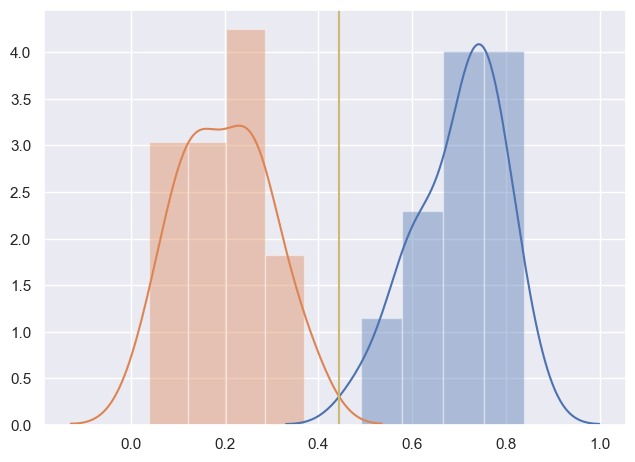

In [31]:
sns.distplot(mean_brightness_d)
sns.distplot(mean_brightness_n)
plt.axvline(111/250, color='y')

Again the right histogram is for day images but with the variance as a feature  
As we can see the error probability is higher

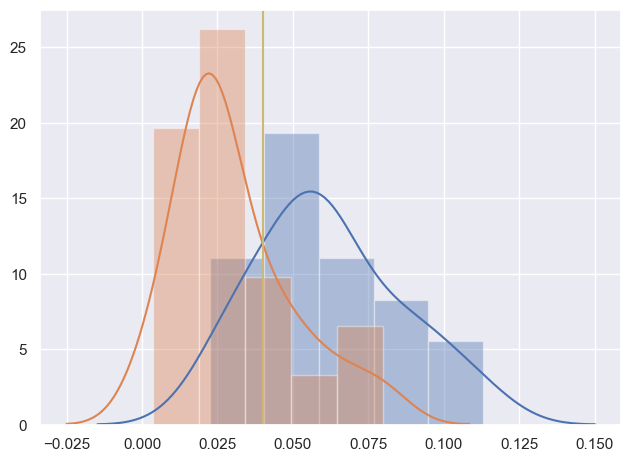

In [80]:
sns.distplot(var_brightness_d)
sns.distplot(var_brightness_n)
plt.axvline(10/250, color='y')